# MMClassification Tutorial
Welcome to MMClassification!

In this tutorial, we demo
* How to do inference with MMCls trained weight
* How to train on your own dataset and visualize the results. 

## Install MMClassification
This step may take several minutes.

We use PyTorch 1.5.0 and CUDA 10.1 for this tutorial. You may install other versions by change the version number in pip install command.

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89
gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [1]:
# Install PyTorch
!pip install -U torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 703.8 MB 36 kB/s  eta 0:00:013    |██████████▊                     | 235.7 MB 146 kB/s eta 0:53:17     |████████████████████████████▎   | 622.4 MB 86 kB/s eta 0:15:37
     |████████████████████████████████| 6.6 MB 126 kB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 829 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 14.5 MB/s eta 0:00:01
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491059 sha256=594c0c9976d2aa51bb65fd67e2d0052f60983a8b2be8ef0ee3469234a0848119
  Stored in directory: /home/SENSETIME/yanglei/.cache/pip/wheels/bc/6f/cd/f72c82ed44590b04c6deb82b177f0d260aec8621f6568e0368
Successfully built future


In [1]:
!rm -rf mmclassification
!git clone https://github.com/yl-1993/mmclassification.git 
%cd mmclassification
!pip install -e .

Cloning into 'mmclassification'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 1863 (delta 91), reused 113 (delta 49), pack-reused 1678
Receiving objects: 100% (1863/1863), 652.06 KiB | 74.00 KiB/s, done.
Resolving deltas: 100% (1109/1109), done.
Checking connectivity... done.
/home/SENSETIME/yanglei/program/mmclassification/demo/mmclassification
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///home/SENSETIME/yanglei/program/mmclassification/demo/mmclassification
  Running setup.py develop for mmcls


In [2]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMClassification installation
import mmcls
print(mmcls.__version__)

1.5.0+cu101 True
0.1.0+c26675b


## Run Inference with MMCls trained weight

In [7]:
!mkdir checkpoints
!wget https://openmmlab.oss-accelerate.aliyuncs.com/mmclassification/v0/imagenet/resnet50_batch256_20200708-cfb998bf.pth -P checkpoints

--2020-10-08 19:08:32--  https://openmmlab.oss-accelerate.aliyuncs.com/mmclassification/v0/imagenet/resnet50_batch256_20200708-cfb998bf.pth
Resolving openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)... 47.106.53.89
Connecting to openmmlab.oss-accelerate.aliyuncs.com (openmmlab.oss-accelerate.aliyuncs.com)|47.106.53.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102491894 (98M) [application/octet-stream]
Saving to: ‘checkpoints/resnet50_batch256_20200708-cfb998bf.pth’

resnet50_batch256_2 100%[===================>]  97.74M  23.0MB/s    in 4.3s    

2020-10-08 19:08:36 (22.7 MB/s) - ‘checkpoints/resnet50_batch256_20200708-cfb998bf.pth’ saved [102491894/102491894]



In [4]:
from mmcls.apis import inference_model, init_model, show_result_pyplot

In [5]:
config_file = 'configs/imagenet/resnet50_b32x8.py'
checkpoint_file = 'checkpoints/resnet50_batch256_20200708-cfb998bf.pth'

In [8]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

/home/SENSETIME/yanglei/program/mmclassification/demo/mmclassification/mmcls/apis/inference.py:41: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [10]:
# test a single image
img = 'demo/demo.JPEG'
result = inference_model(model, img)

/home/SENSETIME/yanglei/program/mmclassification/demo/mmclassification/mmcls/models/classifiers/base.py:216: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


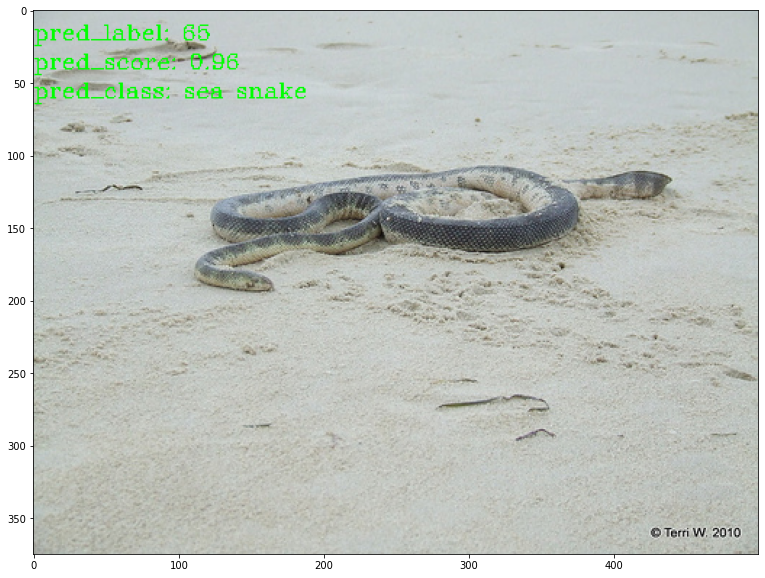

In [11]:
# show the results
show_result_pyplot(model, img, result)

## Train an image classification model on a new dataset

To train on a customized dataset, the following steps are neccessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

### Add a new dataset

Datasets in MMClassification require image and ground-truth labels to be placed in folders with the same perfix. To support a new dataset, we may need to modify the original file structure. 

In this tutorial, we give an example of converting the dataset. You may refer to [docs](https://github.com/open-mmlab/mmclassification/docs/tutorials/new_dataset.md) for details about dataset reorganization. 

We use [Pokemon Image Dataset](https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types) as an example. The dataset consists of 809 images crawled from [pokedex](https://pokemondb.net/pokedex/national). It contains pokemon images from generation 1 to generation 7, along with their primary and secondary types. All images are resized to 120x120.
In this tutorial, we use their primary types for classification. There are 8 classes in total, i.e. sky, tree, road, grass, water, building, mountain, and foreground object.

In [11]:
# download and unzip
!wget http://dags.stanford.edu/data/iccv09Data.tar.gz -O standford_background.tar.gz
!tar xf standford_background.tar.gz

--2020-07-09 19:13:50--  http://dags.stanford.edu/data/iccv09Data.tar.gz
Resolving dags.stanford.edu (dags.stanford.edu)... 171.64.68.10
Connecting to dags.stanford.edu (dags.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14727974 (14M) [application/x-gzip]
Saving to: ‘standford_background.tar.gz’

standford_backgroun 100%[===================>]  14.04M  3.22MB/s    in 4.4s    

2020-07-09 19:13:55 (3.22 MB/s) - ‘standford_background.tar.gz’ saved [14727974/14727974]



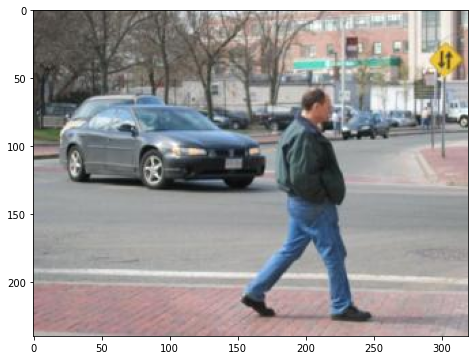

In [12]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('iccv09Data/images/6000124.jpg')
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

We need to convert the annotation into semantic map format as an image.

In [13]:
import os.path as osp
import numpy as np
from PIL import Image
# convert dataset annotation to semantic segmentation map
data_root = 'iccv09Data'
img_dir = 'images'
ann_dir = 'labels'
# define class and plaette for better visualization
classes = ('sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj')
palette = [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34], 
           [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]]
for file in mmcv.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt', 
                                                         '.png')))

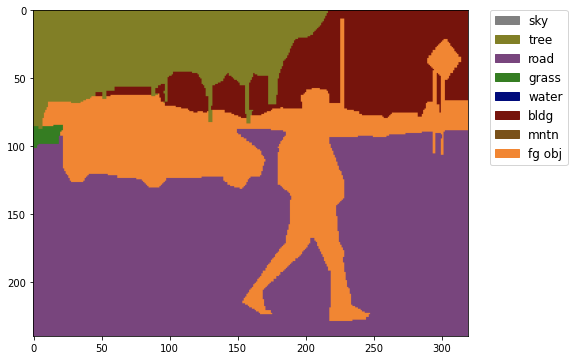

In [14]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('iccv09Data/labels/6000124.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [15]:
# split train/val set randomly
split_dir = 'splits'
mmcv.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmcv.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]
with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as train set
  f.writelines(line + '\n' for line in filename_list[train_length:])

After downloading the data, we need to implement `load_annotations` function in the new dataset class `StandfordBackgroundDataset`.

In [16]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module()
class StandfordBackgroundDataset(CustomDataset):
  CLASSES = classes
  PALETTE = palette
  def __init__(self, split, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', 
                     split=split, **kwargs)
    assert osp.exists(self.img_dir) and self.split is not None

    

### Create a config file
In the next step, we need to modify the config for the training. To accelerate the process, we finetune the model from trained weights.

In [17]:
from mmcv import Config
cfg = Config.fromfile('configs/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes.py')

Since the given config is used to train PSPNet on cityscapes dataset, we need to modify it accordingly for our new dataset.  

In [18]:
from mmseg.apis import set_random_seed

# Since we use ony one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 8
cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path
cfg.dataset_type = 'StandfordBackgroundDataset'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu=8

cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (256, 256)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(320, 240), ratio_range=(0.5, 2.0)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(320, 240),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]


cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = cfg.data_root
cfg.data.train.img_dir = img_dir
cfg.data.train.ann_dir = ann_dir
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'splits/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = cfg.data_root
cfg.data.val.img_dir = img_dir
cfg.data.val.ann_dir = ann_dir
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'splits/val.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = cfg.data_root
cfg.data.test.img_dir = img_dir
cfg.data.test.ann_dir = ann_dir
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'splits/val.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = 'checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.total_iters = 200
cfg.log_config.interval = 10
cfg.evaluation.interval = 200
cfg.checkpoint_config.interval = 200

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://resnet50_v1c',
    backbone=dict(
        type='ResNetV1c',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        dilations=(1, 1, 2, 4),
        strides=(1, 2, 1, 1),
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        style='pytorch',
        contract_dilation=True),
    decode_head=dict(
        type='PSPHead',
        in_channels=2048,
        in_index=3,
        channels=512,
        pool_scales=(1, 2, 3, 6),
        drop_out_ratio=0.1,
        num_classes=8,
        norm_cfg=dict(type='BN', requires_grad=True),
        align_corners=False,
        loss_decode=dict(
            type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0)),
    auxiliary_head=dict(
        type='FCNHead',
        in_channels=1024,
        in_index=2,
        channels=256,
        num_convs=1,
        concat_input=

### Train and Evaluation

In [19]:
from mmcls.datasets import build_dataset
from mmcls.models import build_classifier
from mmcls.apis import train_model


# Build the dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_classifier(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_model(model, datasets, cfg, distributed=False, validate=True, 
                meta=dict())

2020-07-09 19:14:27,264 - mmseg - INFO - Loaded 572 images
Downloading: "https://open-mmlab.s3.ap-northeast-2.amazonaws.com/pretrain/third_party/resnet50_v1c-2cccc1ad.pth" to /root/.cache/torch/checkpoints/resnet50_v1c-2cccc1ad.pth


2020-07-09 19:14:39,770 - mmseg - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2020-07-09 19:14:39,836 - mmseg - INFO - Loaded 143 images
2020-07-09 19:14:39,837 - mmseg - INFO - load checkpoint from checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


2020-07-09 19:14:39,990 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
2020-07-09 19:14:39,994 - mmseg - INFO - Start running, host: root@71c6cf9b06c5, work_dir: /content/mmsegmentation/work_dirs/tutorial
2020-07-09 19:14:39,995 - mmseg - INFO - workflow: [('train', 1)], max: 200 iters
2020-07-09 19:14:54,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 143/143, 10.9 task/s, elapsed: 13s, ETA:     0s

2020-07-09 19:19:22,647 - mmseg - INFO - per class results:
Class                  IoU        Acc
sky                  88.67      94.28
tree                 68.95      86.73
road                 86.23      94.42
grass                70.01      91.35
water                62.08      68.32
bldg                 81.11      88.89
mntn                  0.00       0.00
fg obj               70.39      82.49
Summary:
Scope                 mIoU       mAcc       aAcc
global               65.93      75.81      87.48

2020-07-09 19:19:22,660 - mmseg - INFO - Iter [200/200]	lr: 1.841e-04, mIoU: 0.6593, mAcc: 0.7581, aAcc: 0.8748


Inference with trained model

/content/mmsegmentation/mmseg/models/segmentors/base.py:265: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 576x432 with 0 Axes>

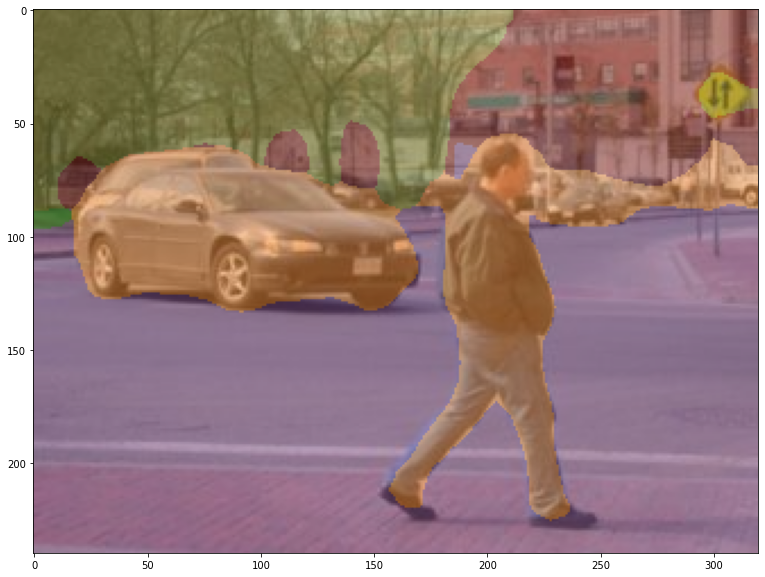

In [20]:
img = mmcv.imread('iccv09Data/images/6000124.jpg')

model.cfg = cfg
result = inference_segmentor(model, img)
plt.figure(figsize=(8, 6))
show_result_pyplot(model, img, result, palette)